In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<AxesSubplot: xlabel='HeartDisease', ylabel='count'>

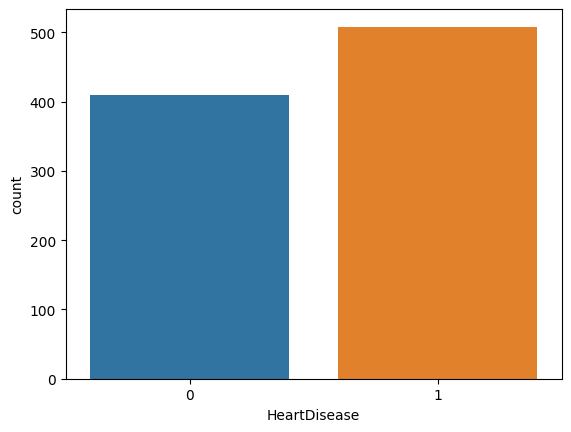

In [4]:
sns.countplot(x='HeartDisease', data=df)

In [5]:
label_encoders = {}

for column in df.columns:
    if df[column].dtype.name == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [6]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [7]:
smote = SMOTE(random_state=42)
X = df.drop(['HeartDisease'],axis=1)
y = df['HeartDisease']
X_res, y_res = smote.fit_resample(X, y)

In [8]:
y_res_df = pd.DataFrame(y_res, columns=['HeartDisease'])
df_resampled = pd.concat([X_res, y_res_df], axis=1)

In [9]:
col = ['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']
col

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [10]:
col_mean = df[col].mean()
col_std = df[col].std()

z_score = (df[col] - col_mean)/col_std

z_threshold = 3

In [11]:
newdf = df
newdf.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [12]:
for i in z_score:
    newdf['Z_score'+str(i)]=z_score[i]

In [13]:
newdf.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Z_scoreAge,Z_scoreRestingBP,Z_scoreCholesterol,Z_scoreFastingBS,Z_scoreMaxHR,Z_scoreOldpeak
0,40,1,1,140,289,0,1,172,0,0.0,2,0,-1.432359,0.410685,0.824621,-0.551041,1.382175,-0.831979
1,49,0,2,160,180,0,1,156,0,1.0,1,1,-0.478223,1.490940,-0.171867,-0.551041,0.753746,0.105606
2,37,1,1,130,283,0,2,98,0,0.0,2,0,-1.750404,-0.129442,0.769768,-0.551041,-1.524307,-0.831979
3,48,0,0,138,214,0,1,108,1,1.5,1,1,-0.584238,0.302660,0.138964,-0.551041,-1.131539,0.574398
4,54,1,2,150,195,0,1,122,0,0.0,2,0,0.051853,0.950812,-0.034736,-0.551041,-0.581664,-0.831979


In [14]:
outliers = np.any(np.abs(z_score) > z_threshold,axis=1)
df1 = df[~outliers]

In [15]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Z_scoreAge,Z_scoreRestingBP,Z_scoreCholesterol,Z_scoreFastingBS,Z_scoreMaxHR,Z_scoreOldpeak
0,40,1,1,140,289,0,1,172,0,0.0,2,0,-1.432359,0.410685,0.824621,-0.551041,1.382175,-0.831979
1,49,0,2,160,180,0,1,156,0,1.0,1,1,-0.478223,1.490940,-0.171867,-0.551041,0.753746,0.105606
2,37,1,1,130,283,0,2,98,0,0.0,2,0,-1.750404,-0.129442,0.769768,-0.551041,-1.524307,-0.831979
3,48,0,0,138,214,0,1,108,1,1.5,1,1,-0.584238,0.302660,0.138964,-0.551041,-1.131539,0.574398
4,54,1,2,150,195,0,1,122,0,0.0,2,0,0.051853,0.950812,-0.034736,-0.551041,-0.581664,-0.831979


In [16]:
for i in range(2):
    print(df.shape[i]-df1.shape[i])

19
0


### Performing chi2_test

In [17]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Z_scoreAge,Z_scoreRestingBP,Z_scoreCholesterol,Z_scoreFastingBS,Z_scoreMaxHR,Z_scoreOldpeak
0,40,1,1,140,289,0,1,172,0,0.0,2,0,-1.432359,0.410685,0.824621,-0.551041,1.382175,-0.831979
1,49,0,2,160,180,0,1,156,0,1.0,1,1,-0.478223,1.490940,-0.171867,-0.551041,0.753746,0.105606
2,37,1,1,130,283,0,2,98,0,0.0,2,0,-1.750404,-0.129442,0.769768,-0.551041,-1.524307,-0.831979
3,48,0,0,138,214,0,1,108,1,1.5,1,1,-0.584238,0.302660,0.138964,-0.551041,-1.131539,0.574398
4,54,1,2,150,195,0,1,122,0,0.0,2,0,0.051853,0.950812,-0.034736,-0.551041,-0.581664,-0.831979


In [18]:
from scipy.stats import chi2_contingency
column = ["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope","FastingBS"]

In [19]:
def chi_squared_test(df, feature, target):
    contingency_table = pd.crosstab(df[feature], df[target])
    chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)
    return chi2_stat, p_val

In [20]:
df1.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'Z_scoreAge', 'Z_scoreRestingBP', 'Z_scoreCholesterol',
       'Z_scoreFastingBS', 'Z_scoreMaxHR', 'Z_scoreOldpeak'],
      dtype='object')

In [21]:
df1=df1.drop(['Z_scoreAge', 'Z_scoreRestingBP', 'Z_scoreCholesterol',
       'Z_scoreFastingBS', 'Z_scoreMaxHR', 'Z_scoreOldpeak'],axis=1)

In [22]:
df1.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1
917,38,1,2,138,175,0,1,173,0,0.0,2,0


In [23]:
chi2_results = {feature: chi_squared_test(df1, feature, 'HeartDisease') for feature in column}

In [24]:
chi2_stats = {feature: result[0] for feature, result in chi2_results.items()}
p_values = {feature: result[1] for feature, result in chi2_results.items()}

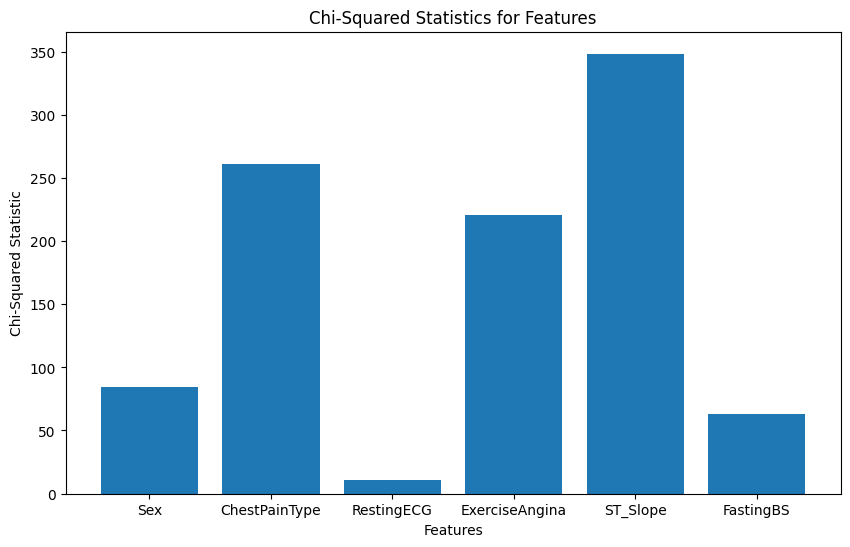

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(chi2_stats.keys(), chi2_stats.values())
plt.xlabel('Features')
plt.ylabel('Chi-Squared Statistic')
plt.title('Chi-Squared Statistics for Features')
plt.show()

In [26]:
chi2_df = pd.DataFrame({
    'Feature': list(chi2_stats.keys()),
    'Chi2_Statistic': list(chi2_stats.values()),
    'p_value': list(p_values.values())
})

In [27]:
chi2_df = chi2_df.sort_values(by=['p_value', 'Chi2_Statistic'], ascending=[True, False]).reset_index(drop=True)

print("Ranked Features Based on Chi-Squared Statistic and p-value:")
print(chi2_df)

Ranked Features Based on Chi-Squared Statistic and p-value:
          Feature  Chi2_Statistic       p_value
0        ST_Slope      348.484760  2.125670e-76
1   ChestPainType      260.798048  3.021144e-56
2  ExerciseAngina      220.912025  5.720706e-50
3             Sex       84.599067  3.654377e-20
4       FastingBS       63.203188  1.864464e-15
5      RestingECG       10.479381  5.301898e-03


In [28]:
alpha = 0.05

# Filter features based on the p-value
significant_features = chi2_df[chi2_df['p_value'] <= alpha]['Feature'].tolist()

In [29]:
significant_features

['ST_Slope',
 'ChestPainType',
 'ExerciseAngina',
 'Sex',
 'FastingBS',
 'RestingECG']

In [30]:
from sklearn.feature_selection import f_classif

In [31]:
columnint = ["Age","RestingBP","Cholesterol","MaxHR","Oldpeak","ST_Slope"]

In [32]:
df1.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [33]:
X = df[columnint]
y = df['HeartDisease'] 

In [34]:
f_values, p_values = f_classif(X, y)

In [35]:
anova_results = pd.DataFrame({
    'Feature': X.columns,
    'F-Value': f_values,
    'P-Value': p_values
})

# Sort by F-Value in descending order
anova_results = anova_results.sort_values(by='F-Value', ascending=False).reset_index(drop=True)

print(anova_results)

       Feature     F-Value       P-Value
0     ST_Slope  415.830346  1.671599e-76
1      Oldpeak  178.615120  2.390772e-37
2        MaxHR  174.913585  1.137786e-36
3          Age   79.160779  3.007953e-18
4  Cholesterol   52.459725  9.308309e-13
5    RestingBP   10.727228  1.095315e-03


In [36]:
significant_features = anova_results[anova_results['P-Value'] <= 0.05]['Feature'].tolist()
print("Significant Features:", significant_features)

Significant Features: ['ST_Slope', 'Oldpeak', 'MaxHR', 'Age', 'Cholesterol', 'RestingBP']


### We cannot drop all the features since it is significant
### From this we come to know every single feature is significant